In [1]:
from frb_ml_utils import * 
import frb_ml_utils
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,f1_score,roc_auc_score,balanced_accuracy_score,fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from dtreeviz.trees import dtreeviz
from dtreeviz import clfviz

In [2]:
CHIME = load_chime()
columns_to_use = ['bc_width','flux','fluence','dm_exc_ne2001',
                  'peak_freq',
                  'bright_temp','rest_width','freq_width','energy']

CHIME['bright_temp'] = np.log10(CHIME['bright_temp'])
CHIME['energy'] = np.log10(CHIME['energy'])
CHIME['rest_width'] = CHIME['rest_width'] * 1000
CHIME['bc_width'] = CHIME['bc_width'] * 1000

CHIME['freq_width'] = np.log10(CHIME['freq_width'])

chime_data = CHIME[columns_to_use]
chime_target = (CHIME['repeater_name'] != '-9999').to_numpy().astype('int')
X,test_X,y,test_y = train_test_split(chime_data,chime_target,test_size=0.3,stratify=chime_target)

scaler = StandardScaler()
scaler.fit(X)  
X = scaler.transform(X)  
test_X = scaler.transform(test_X)
chime_data = scaler.transform(chime_data)

X, y = SMOTE().fit_resample(X, y)

2 78.8 0.00225301 FRB20180729A
12 101.5 0.00225301 FRB20180814A
38 101.0 0.00225301 FRB20180919A
49 94.7 0.00225301 FRB20180928A
75 101.3 0.00225301 FRB20181028A
76 101.3 0.00225301 FRB20181028A
77 101.3 0.00225301 FRB20181028A
78 101.3 0.00225301 FRB20181028A
79 101.3 0.00225301 FRB20181028A
81 62.3 0.00225301 FRB20181030A
82 62.5 0.00225301 FRB20181030B
158 83.6 0.00225301 FRB20181220A
174 92.6 0.00225301 FRB20181223C
221 96.1 0.00225301 FRB20190107B
399 100.8 0.00225301 FRB20190329A
459 79.4 0.00225301 FRB20190425A
571 100.7 0.00225301 FRB20190625E
572 100.7 0.00225301 FRB20190625E
573 100.7 0.00225301 FRB20190625E
576 101.5 0.00225301 FRB20190626A


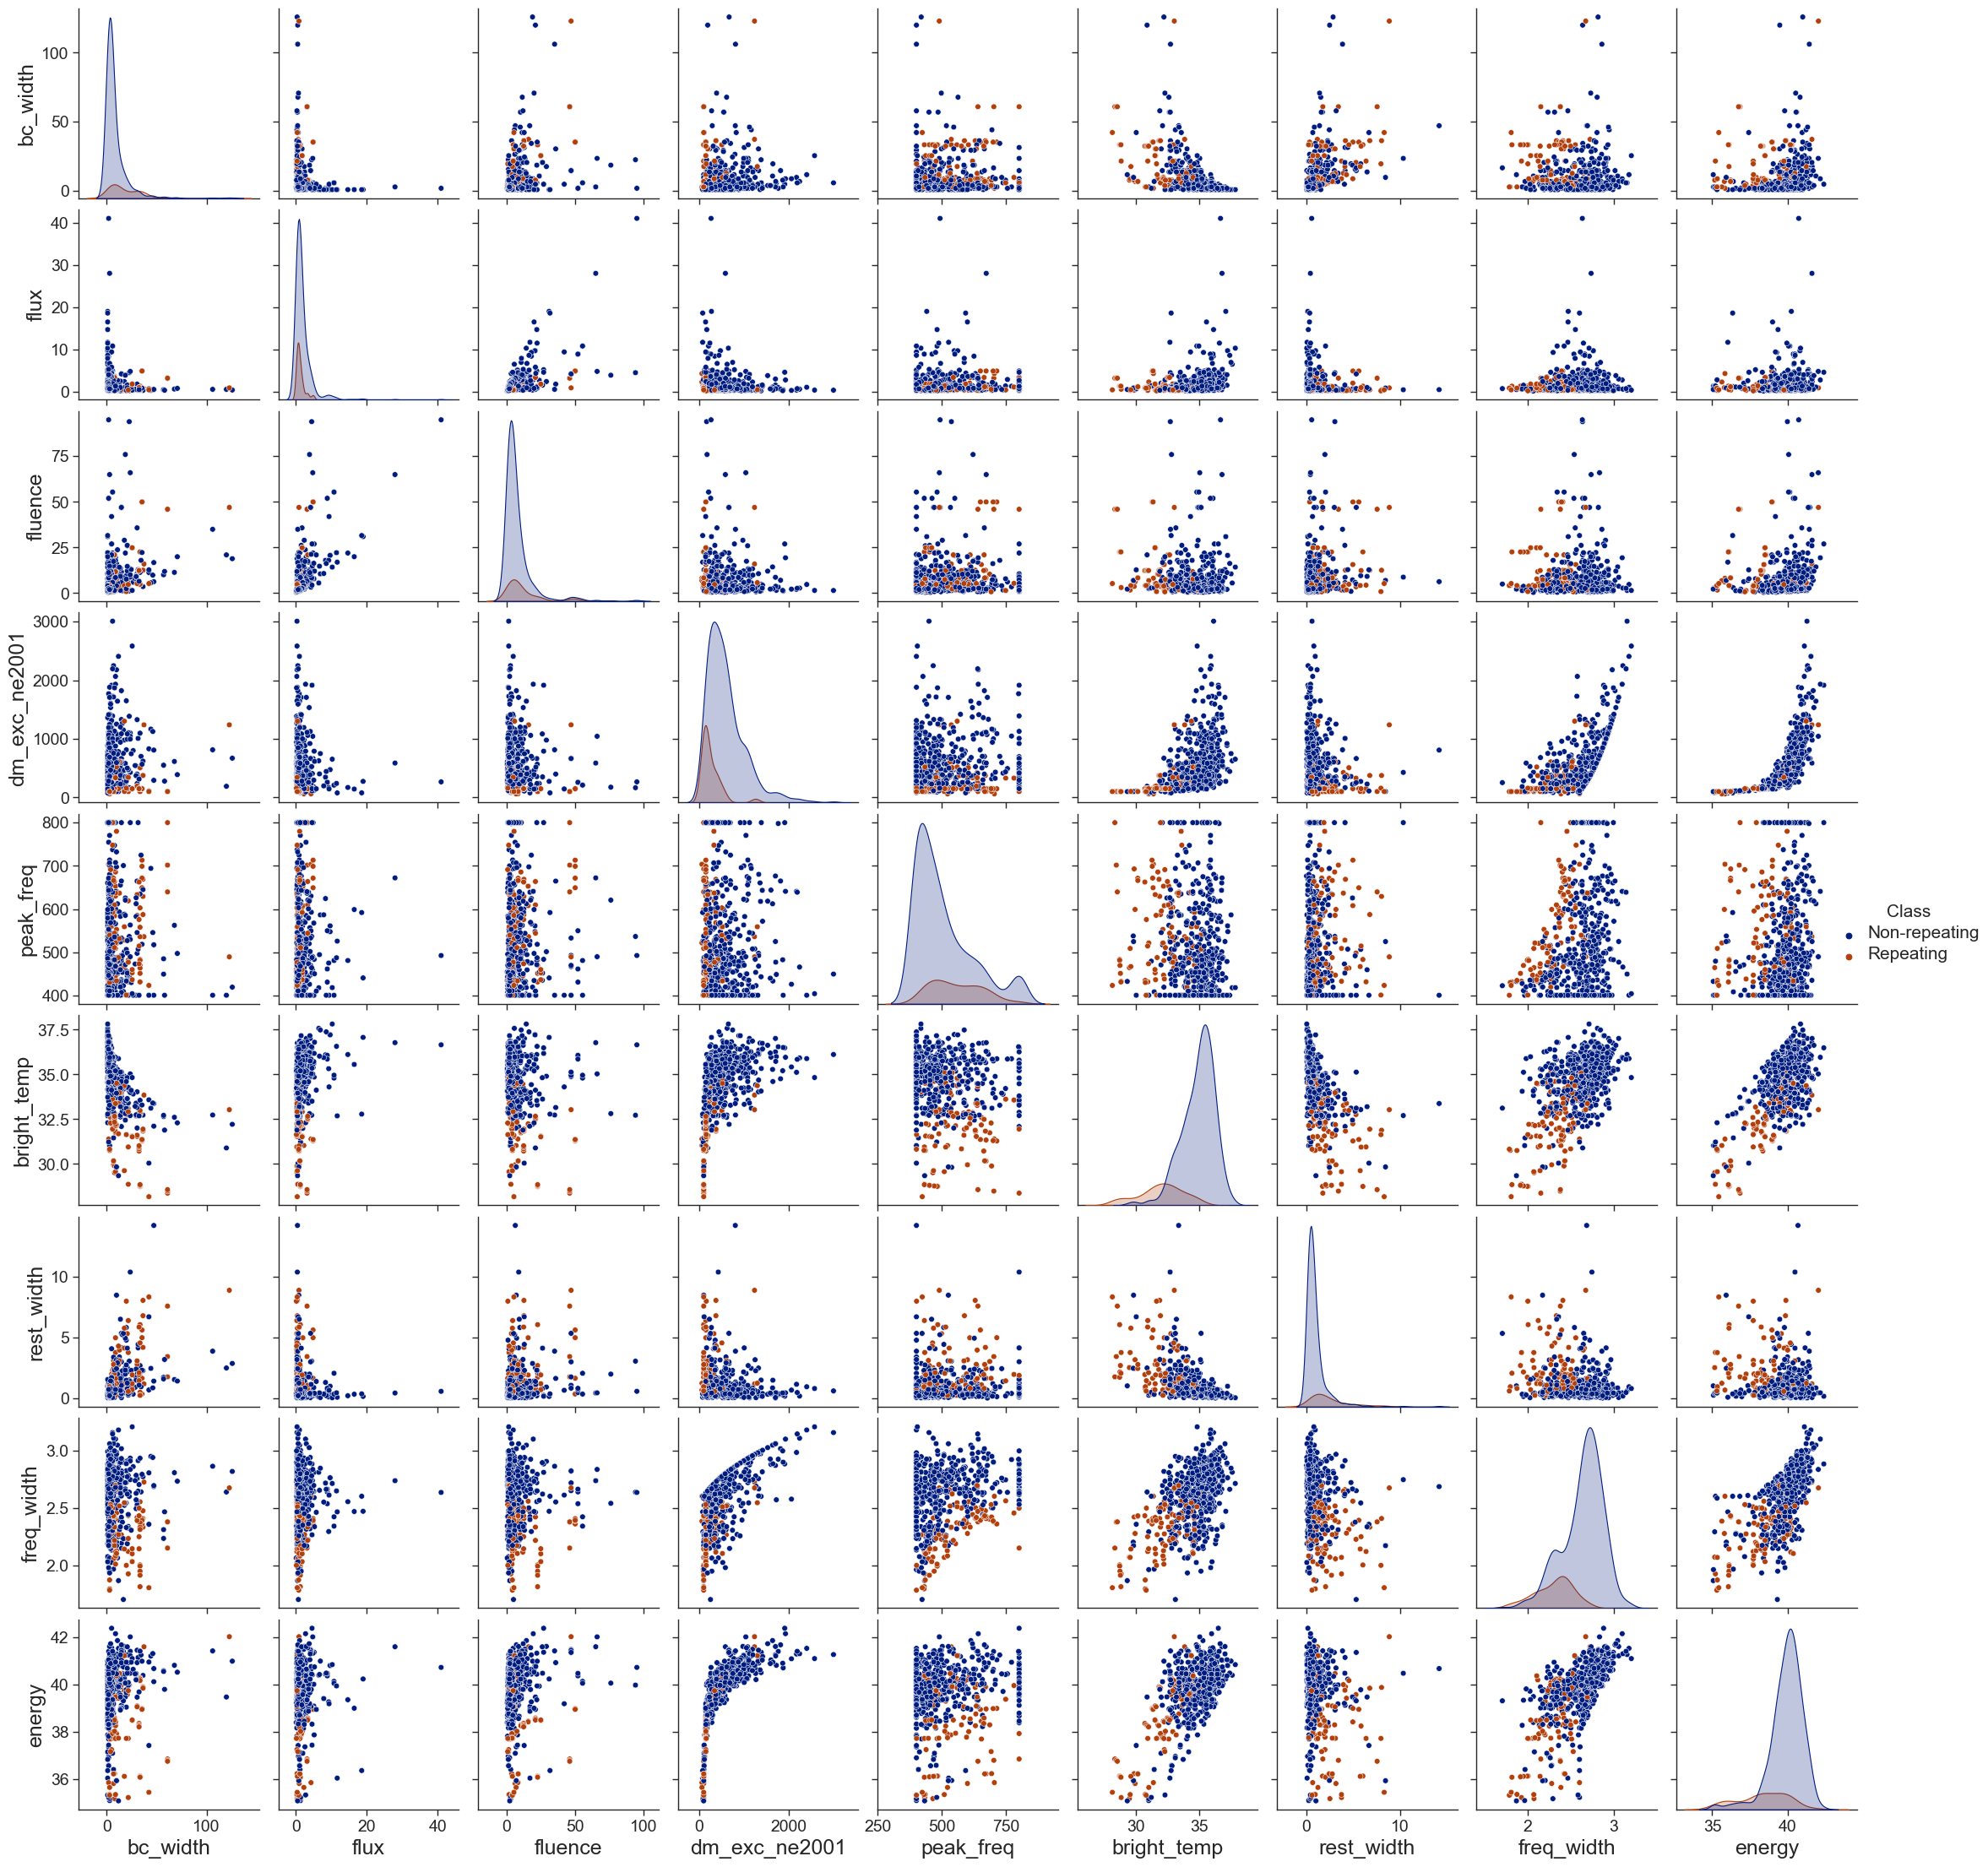

In [3]:
CHIME_for_plot = CHIME.copy()[columns_to_use]
CHIME_for_plot['Class'] = ['Repeating' if row['repeater_name'] != '-9999' else 'Non-repeating' for i,row in CHIME.iterrows()]
sns.set_theme('paper',"ticks",'dark')
sns.set_context("paper", rc={"font.size":10,"axes.labelsize":18})
p = sns.pairplot(pd.concat([CHIME_for_plot], axis=1), hue='Class')
for ax in p.axes.flat:
    ax.tick_params(axis='both', labelsize=14)
p.legend.get_title().set_fontsize(15)
for legend_text in p.legend.get_texts():
    legend_text.set_fontsize(15)
p.tight_layout()
# plt.savefig('./paper/features.pdf')

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
0.8770949720670391
0.6944444444444445
0.8835146641438032
0.8012820512820514


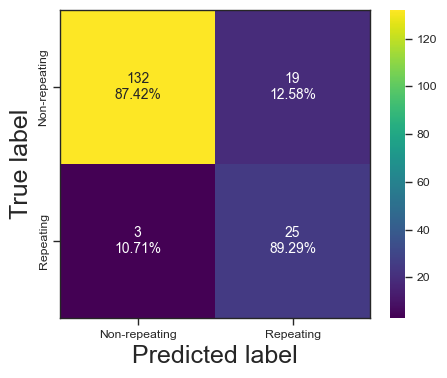

In [4]:
clf = svm.SVC()
clf.fit(X, y)
predictions = clf.predict(test_X)
print(predictions)
print(test_y)
print(accuracy_score(test_y,predictions))
print(f1_score(test_y,predictions))
print(roc_auc_score(test_y,predictions))
print(fbeta_score(test_y,predictions,beta=2))
categories = ['Non-repeating', 'Repeating']
cf = confusion_matrix(test_y, predictions)
make_confusion_matrix(cf, 
                      categories=categories,
                      cmap=plt.cm.viridis,
                      figsize=(5,4),
                      sum_stats=None)
# plt.savefig('./paper/svm_cm.pdf')

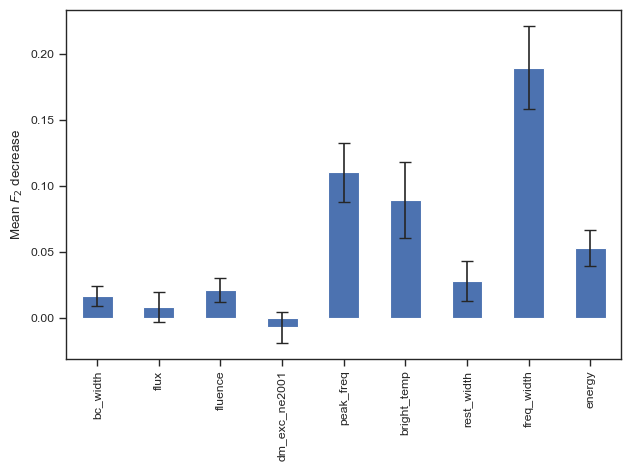

In [5]:
sns.set_theme('paper','ticks')
result = permutation_importance(clf, chime_data, chime_target, n_repeats=100, n_jobs=-1,scoring=f2_score)
forest_importances = pd.Series(result.importances_mean, index=columns_to_use)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,capsize=4)
ax.set_ylabel(r"Mean $F_2$ decrease")
fig.tight_layout()
plt.show()
# fig.savefig('./paper/svm_fi.pdf')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
0.9385474860335196
0.8135593220338982
0.9053926206244087
0.8391608391608392
124    FRB20181128C
154    FRB20181218C
224    FRB20190109B
232    FRB20190112A
323    FRB20190218B
454    FRB20190423B
455    FRB20190423B
Name: tns_name, dtype: object


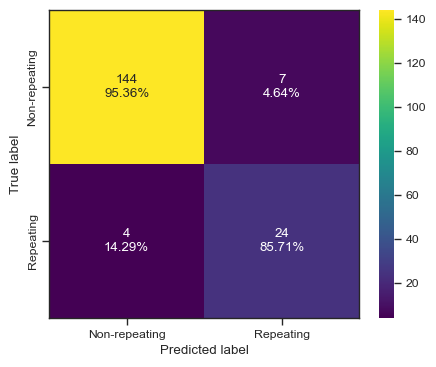

In [6]:
clf = RandomForestClassifier()
clf.fit(X, y)
predictions = clf.predict(test_X)
print(predictions)
print(test_y)
print(accuracy_score(test_y,predictions))
print(f1_score(test_y,predictions))
print(roc_auc_score(test_y,predictions))
print(fbeta_score(test_y,predictions,beta=2))
print(CHIME[np.logical_and(clf.predict(chime_data)==1, chime_target==0)]['tns_name'])
categories = ['Non-repeating', 'Repeating']
cf = confusion_matrix(test_y, predictions)
make_confusion_matrix(cf, 
                      categories=categories,
                      cmap=plt.cm.viridis,
                      figsize=(5,4),
                      sum_stats=None)
# plt.savefig('./paper/rf_cm.pdf')

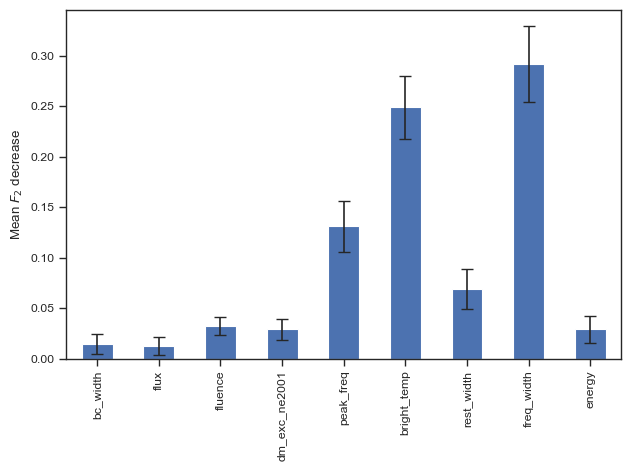

In [7]:
sns.set_theme('paper','ticks')
result = permutation_importance(clf, chime_data, chime_target, n_repeats=100, n_jobs=-1,scoring=f2_score)
forest_importances = pd.Series(result.importances_mean, index=columns_to_use)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,capsize=4)
ax.set_ylabel(r"Mean $F_2$ decrease")
fig.tight_layout()
plt.show()
# fig.savefig('./paper/rf_fi.pdf')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
0.8994413407821229
0.742857142857143
0.9113055818353832
0.8441558441558441
2      FRB20180729A
40     FRB20180920B
84     FRB20181030E
99     FRB20181118B
115    FRB20181125A
117    FRB20181125A
124    FRB20181128C
125    FRB20181128C
154    FRB20181218C
174    FRB2018122

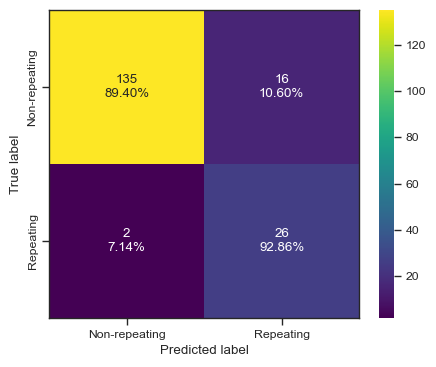

In [8]:
clf = AdaBoostClassifier()
clf.fit(X, y)
predictions = clf.predict(test_X)
print(predictions)
print(test_y)
print(accuracy_score(test_y,predictions))
print(f1_score(test_y,predictions))
print(roc_auc_score(test_y,predictions))
print(fbeta_score(test_y,predictions,beta=2))
print(CHIME[np.logical_and(clf.predict(chime_data)==1, chime_target==0)]['tns_name'])
categories = ['Non-repeating', 'Repeating']
cf = confusion_matrix(test_y, predictions)
make_confusion_matrix(cf, 
                      categories=categories,
                      cmap=plt.cm.viridis,
                      figsize=(5,4),
                      sum_stats=None)
# plt.savefig('./paper/ab_cm.pdf')

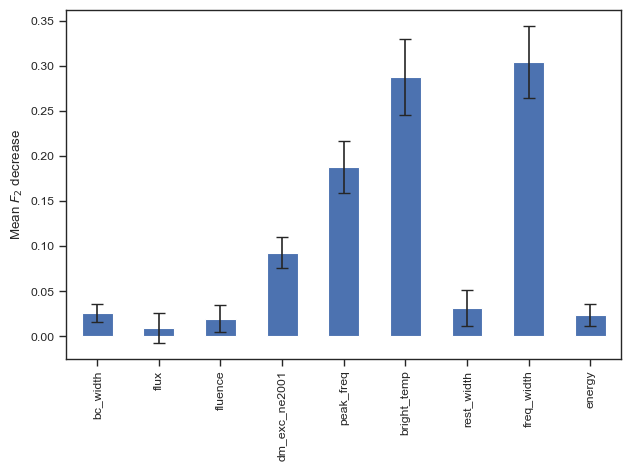

In [9]:
sns.set_theme('paper','ticks')
# result = permutation_importance(clf, test_X, test_y, n_repeats=100, n_jobs=-1,scoring=f2_score)
result = permutation_importance(clf, chime_data, chime_target, n_repeats=100, n_jobs=-1,scoring=f2_score)
forest_importances = pd.Series(result.importances_mean, index=columns_to_use)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,capsize=4)
ax.set_ylabel(r"Mean $F_2$ decrease")
fig.tight_layout()
plt.show()
# fig.savefig('./paper/ab_fi.pdf')

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
0.8603351955307262
0.647887323943662
0.8444891201513718
0.7419354838709676


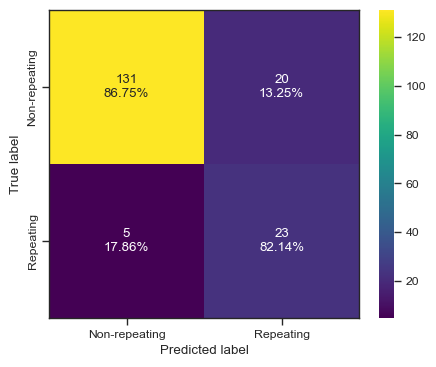

In [10]:
clf = NearestCentroid()
clf.fit(X, y)
predictions = clf.predict(test_X)
print(predictions)
print(test_y)
print(accuracy_score(test_y,predictions))
print(f1_score(test_y,predictions))
print(roc_auc_score(test_y,predictions))
print(fbeta_score(test_y,predictions,beta=2))
categories = ['Non-repeating', 'Repeating']
cf = confusion_matrix(test_y, predictions)
make_confusion_matrix(cf, 
                      categories=categories,
                      cmap=plt.cm.viridis,
                      figsize=(5,4),
                      sum_stats=None)
# plt.savefig('./paper/nc_cm.pdf')

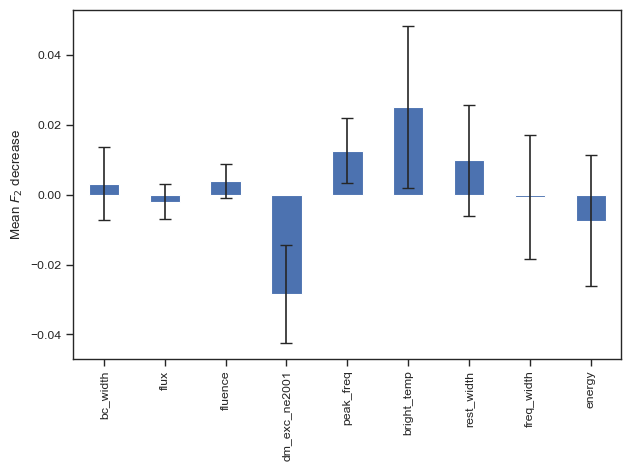

In [11]:
sns.set_theme('paper','ticks')
# result = permutation_importance(clf, test_X, test_y, n_repeats=100, n_jobs=-1,scoring=f2_score)
result = permutation_importance(clf, chime_data, chime_target, n_repeats=100, n_jobs=-1,scoring=f2_score)
forest_importances = pd.Series(result.importances_mean, index=columns_to_use)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,capsize=4)
ax.set_ylabel(r"Mean $F_2$ decrease")
fig.tight_layout()
plt.show()
# fig.savefig('./paper/nc_fi.pdf')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
0.9441340782122905
0.8333333333333334
0.9232497634815515
0.8680555555555555
124    FRB20181128C
154    FRB20181218C
203    FRB20181231B
292    FRB20190206A
323    FRB20190218B
454    FRB20190423B
455    FRB20190423B
Name: tns_name, dtype: object


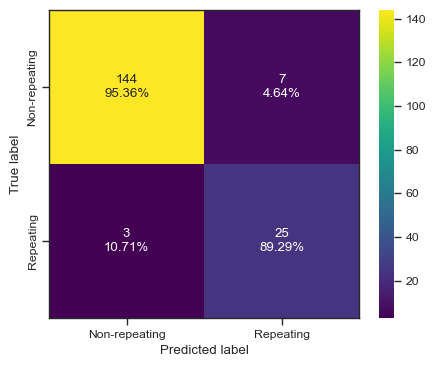

In [12]:
clf = LGBMClassifier()
clf.fit(X, y)
predictions = clf.predict(test_X)
print(predictions)
print(test_y)
print(accuracy_score(test_y,predictions))
print(f1_score(test_y,predictions))
print(roc_auc_score(test_y,predictions))
print(fbeta_score(test_y,predictions,beta=2))
print(CHIME[np.logical_and(clf.predict(chime_data)==1, chime_target==0)]['tns_name'])
categories = ['Non-repeating', 'Repeating']
cf = confusion_matrix(test_y, predictions)
make_confusion_matrix(cf, 
                      categories=categories,
                      cmap=plt.cm.viridis,
                      figsize=(5,4),
                      sum_stats=None)
# plt.savefig('./paper/lgbm_cm.pdf')

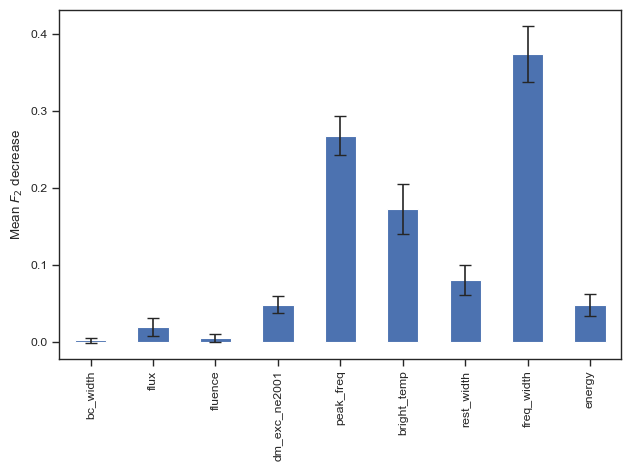

In [13]:
sns.set_theme('paper','ticks')
result = permutation_importance(clf, chime_data, chime_target, n_repeats=100, n_jobs=-1,scoring=f2_score)
forest_importances = pd.Series(result.importances_mean, index=columns_to_use)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,capsize=4)
ax.set_ylabel(r"Mean $F_2$ decrease")
fig.tight_layout()
plt.show()
# fig.savefig('./paper/lgbm_fi.pdf')

d:\home\lab\sarjana\.venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
0.9385474860335196
0.819672131147541
0.9199385052034058
0.8620689655172414
2      FRB20180729A
124    FRB20181128C
154    FRB20181218C
203    FRB20181231B
232    FRB20190112A
323    FRB20190218B
454    FRB20190423B
455    FRB20190423B
Name: tns_name, dtype: object


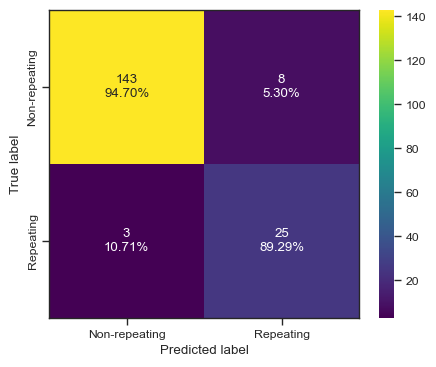

In [14]:
clf = XGBClassifier(use_label_encoder=False)
# clf = CatBoostClassifier()
clf.fit(X, y)
predictions = clf.predict(test_X)
print(predictions)
print(test_y)
print(accuracy_score(test_y,predictions))
print(f1_score(test_y,predictions))
print(roc_auc_score(test_y,predictions))
print(fbeta_score(test_y,predictions,beta=2))
print(CHIME[np.logical_and(clf.predict(chime_data)==1, chime_target==0)]['tns_name'])
categories = ['Non-repeating', 'Repeating']
cf = confusion_matrix(test_y, predictions)
make_confusion_matrix(cf, 
                      categories=categories,
                      cmap=plt.cm.viridis,
                      figsize=(5,4),
                      sum_stats=None)
# plt.savefig('./paper/xgb_cm.pdf')

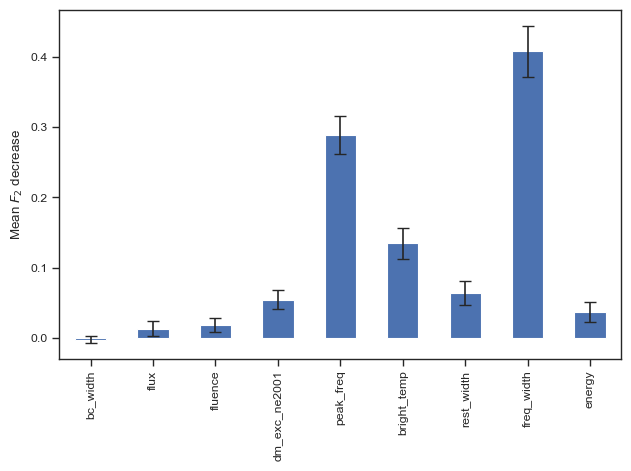

In [15]:
sns.set_theme('paper','ticks')
result = permutation_importance(clf, chime_data, chime_target, n_repeats=100, n_jobs=-1,scoring=f2_score)
forest_importances = pd.Series(result.importances_mean, index=columns_to_use)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax,capsize=4)
ax.set_ylabel(r"Mean $F_2$ decrease")
fig.tight_layout()
plt.show()
# fig.savefig('./paper/xgb_fi.pdf')

2 78.8 0.00225301 FRB20180729A
12 101.5 0.00225301 FRB20180814A
38 101.0 0.00225301 FRB20180919A
49 94.7 0.00225301 FRB20180928A
75 101.3 0.00225301 FRB20181028A
76 101.3 0.00225301 FRB20181028A
77 101.3 0.00225301 FRB20181028A
78 101.3 0.00225301 FRB20181028A
79 101.3 0.00225301 FRB20181028A
81 62.3 0.00225301 FRB20181030A
82 62.5 0.00225301 FRB20181030B
158 83.6 0.00225301 FRB20181220A
174 92.6 0.00225301 FRB20181223C
221 96.1 0.00225301 FRB20190107B
399 100.8 0.00225301 FRB20190329A
459 79.4 0.00225301 FRB20190425A
571 100.7 0.00225301 FRB20190625E
572 100.7 0.00225301 FRB20190625E
573 100.7 0.00225301 FRB20190625E
576 101.5 0.00225301 FRB20190626A
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0

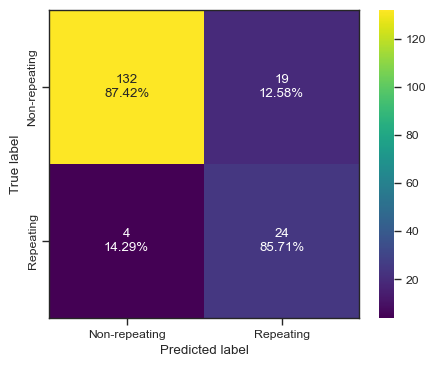

In [16]:
CHIME = load_chime()
columns_to_use = ['bc_width','flux','fluence','dm_exc_ne2001',
                  'peak_freq',
                  'bright_temp','rest_width','freq_width','energy']
CHIME['bright_temp'] = np.log10(CHIME['bright_temp'])
CHIME['energy'] = np.log10(CHIME['energy'])
CHIME['rest_width'] = CHIME['rest_width'] * 1000
CHIME['bc_width'] = CHIME['bc_width'] * 1000
CHIME['freq_width'] = np.log10(CHIME['freq_width'])

chime_data = CHIME[columns_to_use]
chime_target = (CHIME['repeater_name'] != '-9999').to_numpy().astype('int')
X,test_X,y,test_y = train_test_split(chime_data,chime_target,test_size=0.3,stratify=chime_target)

X, y = SMOTE().fit_resample(X, y)
clf = DecisionTreeClassifier(max_depth=5)  
clf.fit(X, y)
predictions = clf.predict(test_X)
print(predictions)
print(test_y)
print(accuracy_score(test_y,predictions))
print(f1_score(test_y,predictions))
print(roc_auc_score(test_y,predictions))
print(fbeta_score(test_y,predictions,beta=2))
categories = ['Non-repeating', 'Repeating']
cf = confusion_matrix(test_y, predictions)
make_confusion_matrix(cf, 
                      categories=categories,
                      cmap=plt.cm.viridis,
                      figsize=(5,4),
                      sum_stats=None)
# plt.savefig('./paper/tree_cm.pdf')

d:\home\lab\sarjana\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


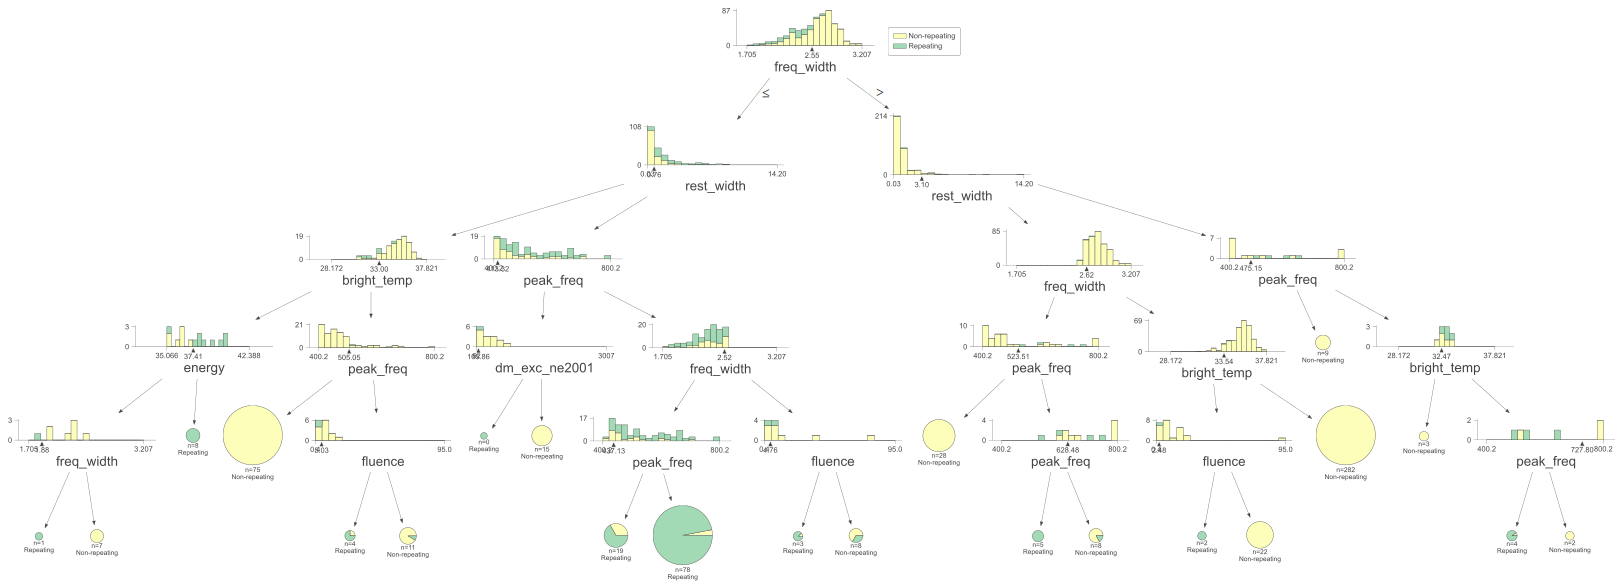

In [17]:
viz = dtreeviz(clf, chime_data, chime_target,feature_names=columns_to_use,class_names=['Non-repeating','Repeating'],label_fontsize=18,ticks_fontsize=10)
viz
# viz.save('./paper/tree_vis_new.svg')

2 78.8 0.00225301 FRB20180729A
12 101.5 0.00225301 FRB20180814A
38 101.0 0.00225301 FRB20180919A
49 94.7 0.00225301 FRB20180928A
75 101.3 0.00225301 FRB20181028A
76 101.3 0.00225301 FRB20181028A
77 101.3 0.00225301 FRB20181028A
78 101.3 0.00225301 FRB20181028A
79 101.3 0.00225301 FRB20181028A
81 62.3 0.00225301 FRB20181030A
82 62.5 0.00225301 FRB20181030B
158 83.6 0.00225301 FRB20181220A
174 92.6 0.00225301 FRB20181223C
221 96.1 0.00225301 FRB20190107B
399 100.8 0.00225301 FRB20190329A
459 79.4 0.00225301 FRB20190425A
571 100.7 0.00225301 FRB20190625E
572 100.7 0.00225301 FRB20190625E
573 100.7 0.00225301 FRB20190625E
576 101.5 0.00225301 FRB20190626A
[0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1

d:\home\lab\sarjana\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\home\lab\sarjana\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


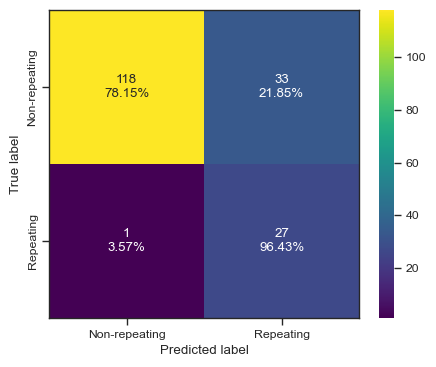

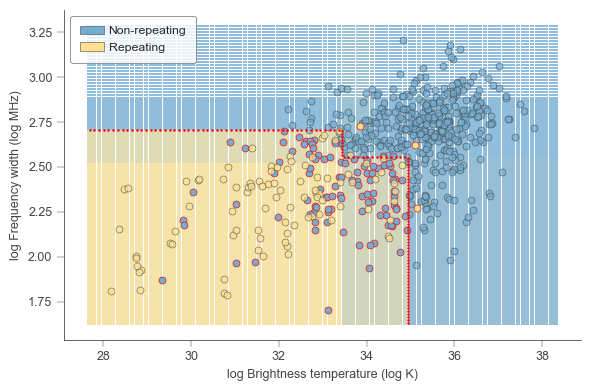

In [18]:
CHIME = load_chime()

CHIME['bright_temp'] = np.log10(CHIME['bright_temp'])
CHIME['freq_width'] = np.log10(CHIME['freq_width'])

clf = imbpipeline(steps = [['scaler', StandardScaler()],
                           ['smote', SMOTE()],
                           ['classifier', DecisionTreeClassifier(max_depth=3)]])
d2_columns = ['bright_temp','freq_width']
chime_data_2d = CHIME[d2_columns]
X_2d,test_X_2d,y_2d,test_y_2d = train_test_split(chime_data_2d,chime_target,test_size=0.3,stratify=chime_target)
clf.fit(X_2d, y_2d)
predictions = clf.predict(test_X_2d)
print(predictions)
print(test_y_2d)
print(accuracy_score(test_y_2d,predictions))
print(f1_score(test_y_2d,predictions))
print(roc_auc_score(test_y_2d,predictions))
print(fbeta_score(test_y_2d,predictions,beta=2))
categories = ['Non-repeating', 'Repeating']
cf = confusion_matrix(test_y_2d, predictions)
make_confusion_matrix(cf, 
                      categories=categories,
                      cmap=plt.cm.viridis,
                      figsize=(5,4),
                      sum_stats=None)
# plt.savefig('./paper/2d_confusion.pdf')

fig,ax = plt.subplots(figsize=(6,4))
clfviz(clf, chime_data_2d, chime_target, ax=ax, ntiles=100,
       show=['instances', 'boundaries', 'probabilities', 'misclassified'],
       class_names=['non-repeating','repeating'],
       feature_names=['log Brightness temperature (log K)','log Frequency width (log MHz)'],
       colors={'class_boundary': 'red','classes':[None,  None,  ["#73ADD2", "#FEE08F"]]})

box1 = patches.Rectangle((0, 0), 20, 10, linewidth=.4, label='Non-repeating',edgecolor='#444443',facecolor='#73ADD2')
box2 = patches.Rectangle((0, 0), 20, 10, linewidth=.4, label='Repeating',edgecolor='#444443',facecolor='#FEE08F')
boxes = [box1,box2]
leg = ax.legend(handles=boxes,frameon=True,shadow=False,fancybox=True,handletextpad=.35,borderpad=.8,edgecolor='#444443')
leg.get_frame().set_linewidth(.5)
plt.tight_layout()
plt.show()
# fig.savefig('./paper/2d_boundary.pdf')